## CSE-221710306050-rahul.k


## Project: Wine Quality prediction

#### AIM:
 - The aim of the project is to find out what factors which affect the quality of the wine.

### Machine learning:
- Predictive modeling is the general concept of building a model that is capable of making predictions. Typically, such a model includes a machine learning algorithm that learns certain properties from a training dataset in order to make those predictions.

### DATA:
- the data we need,is all the components which go into the making of a wine or the factors which can alter the taste of wine
- kaggle is the place ,from where i got the data
- [document link](wine.csv)

#### In this step we import all the libraries which are required to perform some machine learning algorithims 

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

#### During this step we read the data
- and gather some basic information from the data set

In [2]:
wine=pd.read_csv("wine.csv")
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


#### here we are converting a categorical coloumn into variable coloumn for performing some actions in the coming steps

In [3]:
number=LabelEncoder()
wine["color"]=number.fit_transform(wine['color'].astype('string'))

wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


#### checking for any null values which are preset in any of the coloumns

In [4]:
wine.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
dtype: bool

#### As the dataset contains n no.of rows we can minimize the dataset and perform machine learning operations on them .cause it possess the same set of attributes of the overall dataset, and minimizing it can save us with compilation time  

In [5]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


#### checking unique values of quality attribute

In [6]:
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

#### finding out the number values ,which fall into the unique values of the quality attribute

In [7]:
wine.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

#### we are just plotting the values of quality 

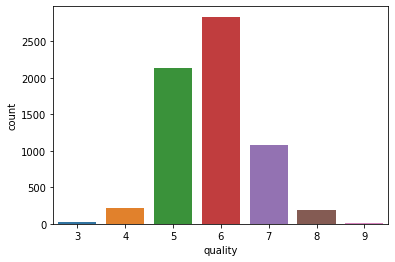

In [8]:
sns.countplot(wine['quality'])

#### in this we are grouping the quality attribute into 3 parts:
- if greater then 7 :superior
- if between 4-7:good
- if less then 4:inferior

In [9]:
con=[
    wine["quality"]>=7, wine["quality"]<=4
]
rating=['superior','inferior']
wine['rating']=np.select(con,rating,default='good')
wine.rating.value_counts()

good        4974
superior    1277
inferior     246
Name: rating, dtype: int64

#### segregating the values by the rating used in the above call and taking their mean values

In [10]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
rating,,,,,,,,,,,,,
good,7.241536,0.346423,0.316765,5.659087,0.058674,30.766285,117.744069,0.995113,3.215346,0.529908,10.265275,5.570165,0.734821
inferior,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049,0.743902
superior,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,0.830070


#### taking the heatmap of the data to get a better picture of dataset and to find the comparison of different values to different attributes

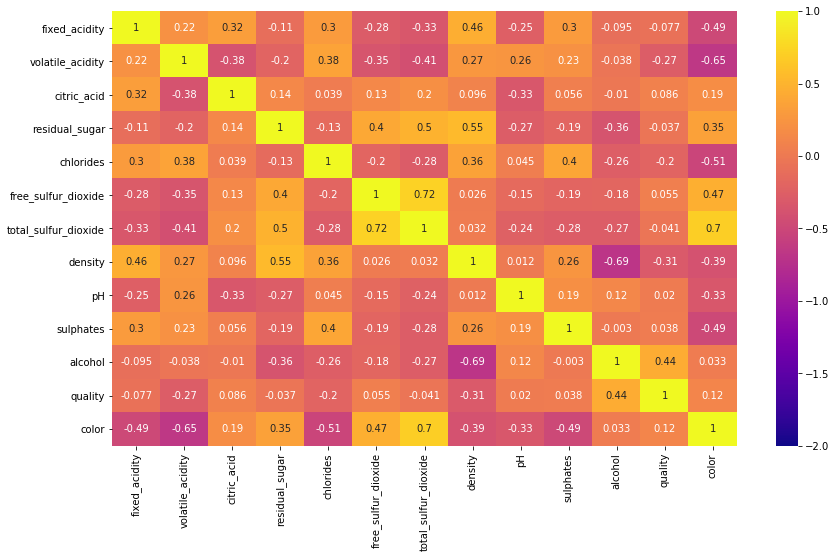

In [11]:
correlation=wine.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,vmin=-2,cmap="plasma")

#### by this step we can find out on what the quality of wine depends on 

In [12]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
color                   0.119323
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

#### seeing the quality and the no.of users for each wine

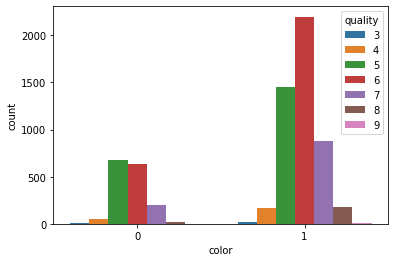

In [13]:
sns.countplot(x="color", hue="quality",data=wine)

#### a histogram for all the datasets and by the diagram we can find out the data is not organised and it difficult to predict any proper information

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F535B8248>,
      dtype=object)

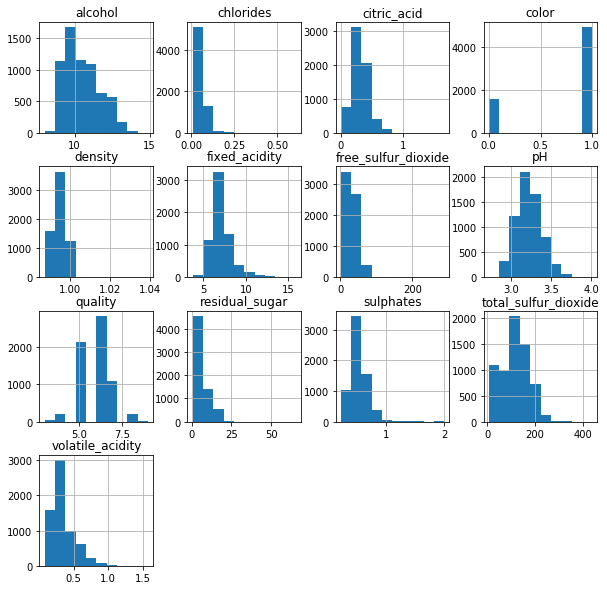

In [14]:
wine.hist(figsize=(10,10))

#### finding the correlation for between the quality and here we can see that the rating of the values as 
- good(5-6)
- superior(7-9)
- inferior(3-4)

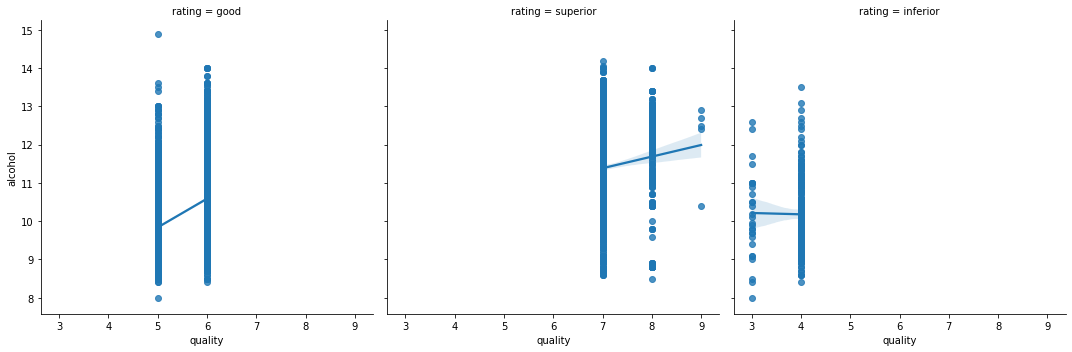

In [15]:
sns.lmplot(y="alcohol" ,x="quality",col="rating",data=wine)

#### here we are dividing the data into training and testing to perform machine learning algorithms 
 - we divide the data into 80% into training and the other into testing
 - this helps us in getting the optimal solution

In [16]:
from sklearn.model_selection import train_test_split
x=wine[wine.columns[:-1]]
y=wine["quality"]

x_train , x_test , y_train , y_test =train_test_split(x,y ,test_size=.2)

In [17]:
sc=StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

#### we are describing the values in y_test and y_train

In [18]:
for wine in [y_train,y_test]:
    print(wine.describe())

count    5197.000000
mean        5.819704
std         0.873666
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
count    1300.000000
mean        5.813077
std         0.871929
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


#### picking a model:
- kneighnour classifier
- random forest classifier
- decison tree classifier
- SGDClassifier
- Adaboostclassifier

 #### kneighbour classifier : here we can see that the accuracy is 94%

In [19]:
n5=KNeighborsClassifier(n_neighbors=5)
n5.fit(x_train_std,y_train)
predict_n5=n5.predict(x_test_std)
print(classification_report(y_test,predict_n5))
cross_val=cross_val_score(estimator=n5 , X=x_train_std,y=y_train,cv=4)
print(cross_val.mean())

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.83      0.55      0.66        44
           5       0.93      0.96      0.94       433
           6       0.95      0.98      0.96       557
           7       0.93      0.93      0.93       225
           8       0.91      0.62      0.74        34
           9       0.00      0.00      0.00         1

    accuracy                           0.93      1300
   macro avg       0.65      0.58      0.60      1300
weighted avg       0.93      0.93      0.93      1300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9197597264167703


#### A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [20]:
confusion_matrix(y_test,predict_n5)

array([[  0,   3,   3,   0,   0,   0,   0],
       [  0,  24,  20,   0,   0,   0,   0],
       [  0,   2, 415,  16,   0,   0,   0],
       [  0,   0,  10, 544,   3,   0,   0],
       [  0,   0,   0,  14, 210,   1,   0],
       [  0,   0,   0,   0,  13,  21,   0],
       [  0,   0,   0,   0,   0,   1,   0]], dtype=int64)

#### heatmap for the confusion matrix

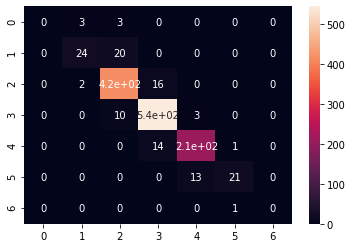

In [21]:
sns.heatmap(confusion_matrix(y_test,predict_n5),annot=True)

#### random forest classifier : this has got accuracy of 100% ,but we check other classifiers if they have got better accuracy and less recall value

In [22]:
rf=RandomForestClassifier()
rf.fit(x_train_std,y_train)
predict_rf=rf.predict(x_test_std)
print(classification_report(y_test,predict_rf))
cross_val=cross_val_score(estimator=rf,X=x_train_std , y=y_train,cv=4)
print(cross_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       1.00      0.67      0.80         6
           4       0.96      1.00      0.98        44
           5       1.00      1.00      1.00       433
           6       1.00      1.00      1.00       557
           7       1.00      1.00      1.00       225
           8       0.97      0.97      0.97        34
           9       0.00      0.00      0.00         1

    accuracy                           1.00      1300
   macro avg       0.85      0.81      0.82      1300
weighted avg       1.00      1.00      1.00      1300

[0.99461538 0.99384142 0.99461124 0.99384142]


In [23]:
confusion_matrix(y_test,predict_rf)

array([[  4,   2,   0,   0,   0,   0,   0],
       [  0,  44,   0,   0,   0,   0,   0],
       [  0,   0, 433,   0,   0,   0,   0],
       [  0,   0,   0, 557,   0,   0,   0],
       [  0,   0,   0,   0, 225,   0,   0],
       [  0,   0,   0,   0,   1,  33,   0],
       [  0,   0,   0,   0,   0,   1,   0]], dtype=int64)

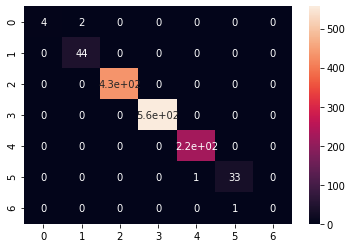

In [24]:
sns.heatmap(confusion_matrix(y_test,predict_rf),annot=True)

#### decision tree classifier: this classifier has got 100% accuracy and this is the best model compared to the other models

In [25]:
dt=DecisionTreeClassifier()
dt.fit(x_train_std,y_train)
predict_dt=dt.predict(x_test_std)
print(classification_report(y_test,predict_dt))
cross_val=cross_val_score(estimator=dt,X=x_train_std , y=y_train,cv=4)
print(cross_val)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00       433
           6       1.00      1.00      1.00       557
           7       1.00      1.00      1.00       225
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00         1

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

[1. 1. 1. 1.]


In [26]:
confusion_matrix(y_test,predict_dt)

array([[  6,   0,   0,   0,   0,   0,   0],
       [  0,  44,   0,   0,   0,   0,   0],
       [  0,   0, 433,   0,   0,   0,   0],
       [  0,   0,   0, 557,   0,   0,   0],
       [  0,   0,   0,   0, 225,   0,   0],
       [  0,   0,   0,   0,   0,  34,   0],
       [  0,   0,   0,   0,   0,   0,   1]], dtype=int64)

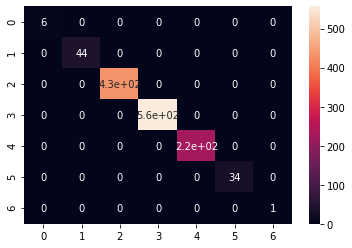

In [27]:
sns.heatmap(confusion_matrix(y_test,predict_dt),annot=True)

#### AdaBoost classifier: this classifier has got 78% accuracy and this is the best model compared to the other models

In [28]:
ad=AdaBoostClassifier()
ad.fit(x_train_std,y_train)
predict_ad=ad.predict(x_test_std)
print(classification_report(y_test,predict_ad))
cross_val=cross_val_score(estimator=ad,X=x_train_std , y=y_train,cv=2)
print(cross_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.00      0.00      0.00        44
           5       0.91      1.00      0.95       433
           6       0.68      1.00      0.81       557
           7       0.00      0.00      0.00       225
           8       0.00      0.00      0.00        34
           9       1.00      1.00      1.00         1

    accuracy                           0.77      1300
   macro avg       0.51      0.57      0.54      1300
weighted avg       0.60      0.77      0.67      1300

[0.77183532 0.77213241]


In [29]:
confusion_matrix(y_test,predict_ad)

array([[  6,   0,   0,   0,   0,   0,   0],
       [  0,   0,  44,   0,   0,   0,   0],
       [  0,   0, 433,   0,   0,   0,   0],
       [  0,   0,   0, 557,   0,   0,   0],
       [  0,   0,   0, 225,   0,   0,   0],
       [  0,   0,   0,  34,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1]], dtype=int64)

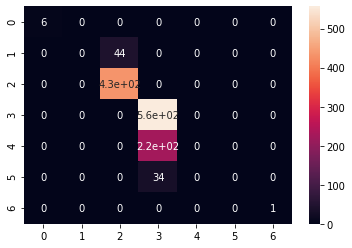

In [30]:
sns.heatmap(confusion_matrix(y_test,predict_ad),annot=True)

#### GradientBoosting classifier: this classifier has got 100% accuracy and this is the best model compared to the other model

In [31]:
gd=GradientBoostingClassifier()
gd.fit(x_train_std,y_train)
predict_gd=gd.predict(x_test_std)
print(classification_report(y_test,predict_gd))
cross_val=cross_val_score(estimator=gd,X=x_train_std , y=y_train,cv=2)
print(cross_val)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00       433
           6       1.00      1.00      1.00       557
           7       1.00      1.00      1.00       225
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00         1

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

[1. 1.]


In [32]:
confusion_matrix(y_test,predict_gd)

array([[  6,   0,   0,   0,   0,   0,   0],
       [  0,  44,   0,   0,   0,   0,   0],
       [  0,   0, 433,   0,   0,   0,   0],
       [  0,   0,   0, 557,   0,   0,   0],
       [  0,   0,   0,   0, 225,   0,   0],
       [  0,   0,   0,   0,   0,  34,   0],
       [  0,   0,   0,   0,   0,   0,   1]], dtype=int64)

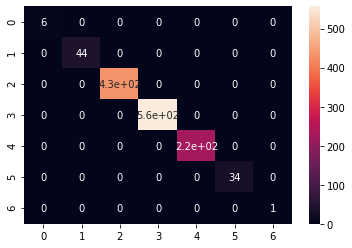

In [33]:
sns.heatmap(confusion_matrix(y_test,predict_gd),annot=True) 

 ### Prediction:
- by the above models i can confirm that the gradient boosting classifier is the best model as it has got a accuracy of value of 100% ,and the quality of the wine depends on the quality